In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("Test/med_insurance.csv")

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.info() # form this we can say that there are no Null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:>

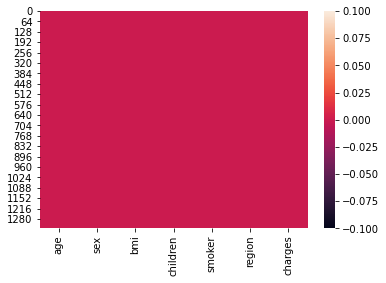

In [7]:
# Checking in Visual if there are any null or NA values
sns.heatmap(df.isnull())

In [8]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [9]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [14]:
df['sex'].replace({'female':0,'male':1},inplace=True)

In [10]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [15]:
df['smoker'].replace({'yes':1,'no':0},inplace=True)

In [11]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
df['region'].replace({'southwest':0,'southeast':1,'northwest':2,'northeast':3},inplace=True)

In [17]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [13]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Preparing the Data

In [21]:
X = df.drop(["charges"], axis=1).values

In [22]:
y = df['charges'].values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

##  Linear Regression

In [24]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [25]:
df.columns

Index(['age', 'bmi', 'children', 'charges', 'sex', 'smoker', 'region'], dtype='object')

In [26]:
X = ['age', 'bmi', 'children', 'sex', 'smoker', 'region']

In [27]:
coeff_df = pd.DataFrame(regr.coef_,X,["Coefficient"])
coeff_df

,Coefficient
age,253.991852
bmi,328.402617
children,443.729295
sex,-24.324551
smoker,23568.879484
region,-288.508573


In [28]:
y_pred=regr.predict(X_test)

In [29]:
dfpred=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfpred

,Actual,Predicted
0,9724.53000,11017.230479
1,8547.69130,9787.530168
2,45702.02235,37994.782118
3,12950.07120,16122.778407
4,9644.25250,6930.759230
...,...,...
263,15019.76005,14699.098767
264,6664.68595,8210.854549
265,20709.02034,16019.284542
266,40932.42950,33104.944084


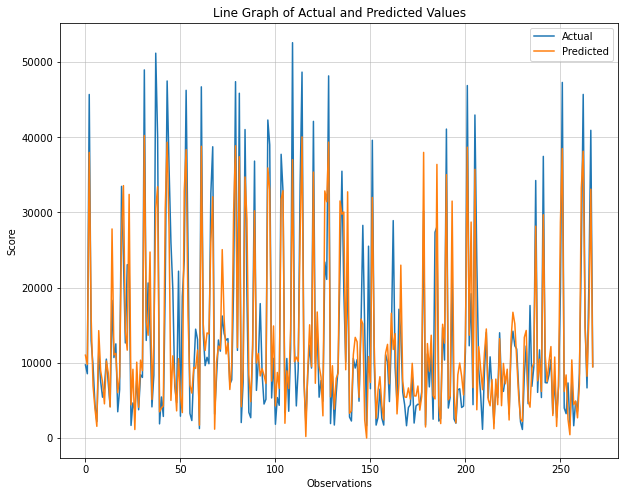

In [30]:
dfpred.plot(kind='line',figsize=(10,8))
plt.grid(which='major',linestyle='-',linewidth='0.5')
plt.grid(which='minor',linestyle=':',linewidth='0.5')
plt.ylabel('Score')
plt.xlabel('Observations')
plt.title('Line Graph of Actual and Predicted Values')
plt.show()

In [31]:
print('mean_absolute_error: ',mean_absolute_error(y_test,y_pred))
print('mean_squared_error: ',mean_squared_error(y_test,y_pred))
print('mean_absolute_error: ',np.sqrt(mean_absolute_error(y_test,y_pred)))

mean_absolute_error:  3930.3332739011453
mean_squared_error:  31845929.134159442
mean_absolute_error:  62.69237014103985
